In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from copy import copy

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('currencies.csv')
df.head()

,Currency,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
0,"July 01, 2016",9.29446,1.25367,143.645,1.05054,1.39596,NaN,1.87126,0.524882,NaN,...,20.3528,202.763,11.8246,1.36009,NaN,9.28428,3.06035,5.12668,NaN,13.9247
1,"July 05, 2016",9.31515,1.25322,142.715,1.06143,1.39684,154.063,1.85825,0.525213,15.2162,...,20.6240,202.886,11.7627,1.35689,49.0655,9.26724,NaN,5.12992,42.9026,13.9335
2,"July 06, 2016",9.31697,1.25834,140.540,1.07300,1.39286,154.094,1.87313,0.523717,15.2392,...,20.7232,NaN,11.8805,1.36208,49.0692,9.25643,NaN,5.11527,42.6425,13.8938
3,"July 07, 2016",9.31315,1.25737,140.640,1.06911,1.39316,153.957,1.85236,0.523829,15.1430,...,20.4288,202.351,11.9192,1.36098,49.0295,NaN,NaN,5.11637,42.4176,13.8968
4,"July 08, 2016",9.31350,1.25797,140.510,1.07261,1.39257,154.062,1.85974,0.523607,15.1202,...,20.6063,202.271,11.9327,1.36472,49.0408,9.26432,NaN,5.11423,42.2060,13.8909


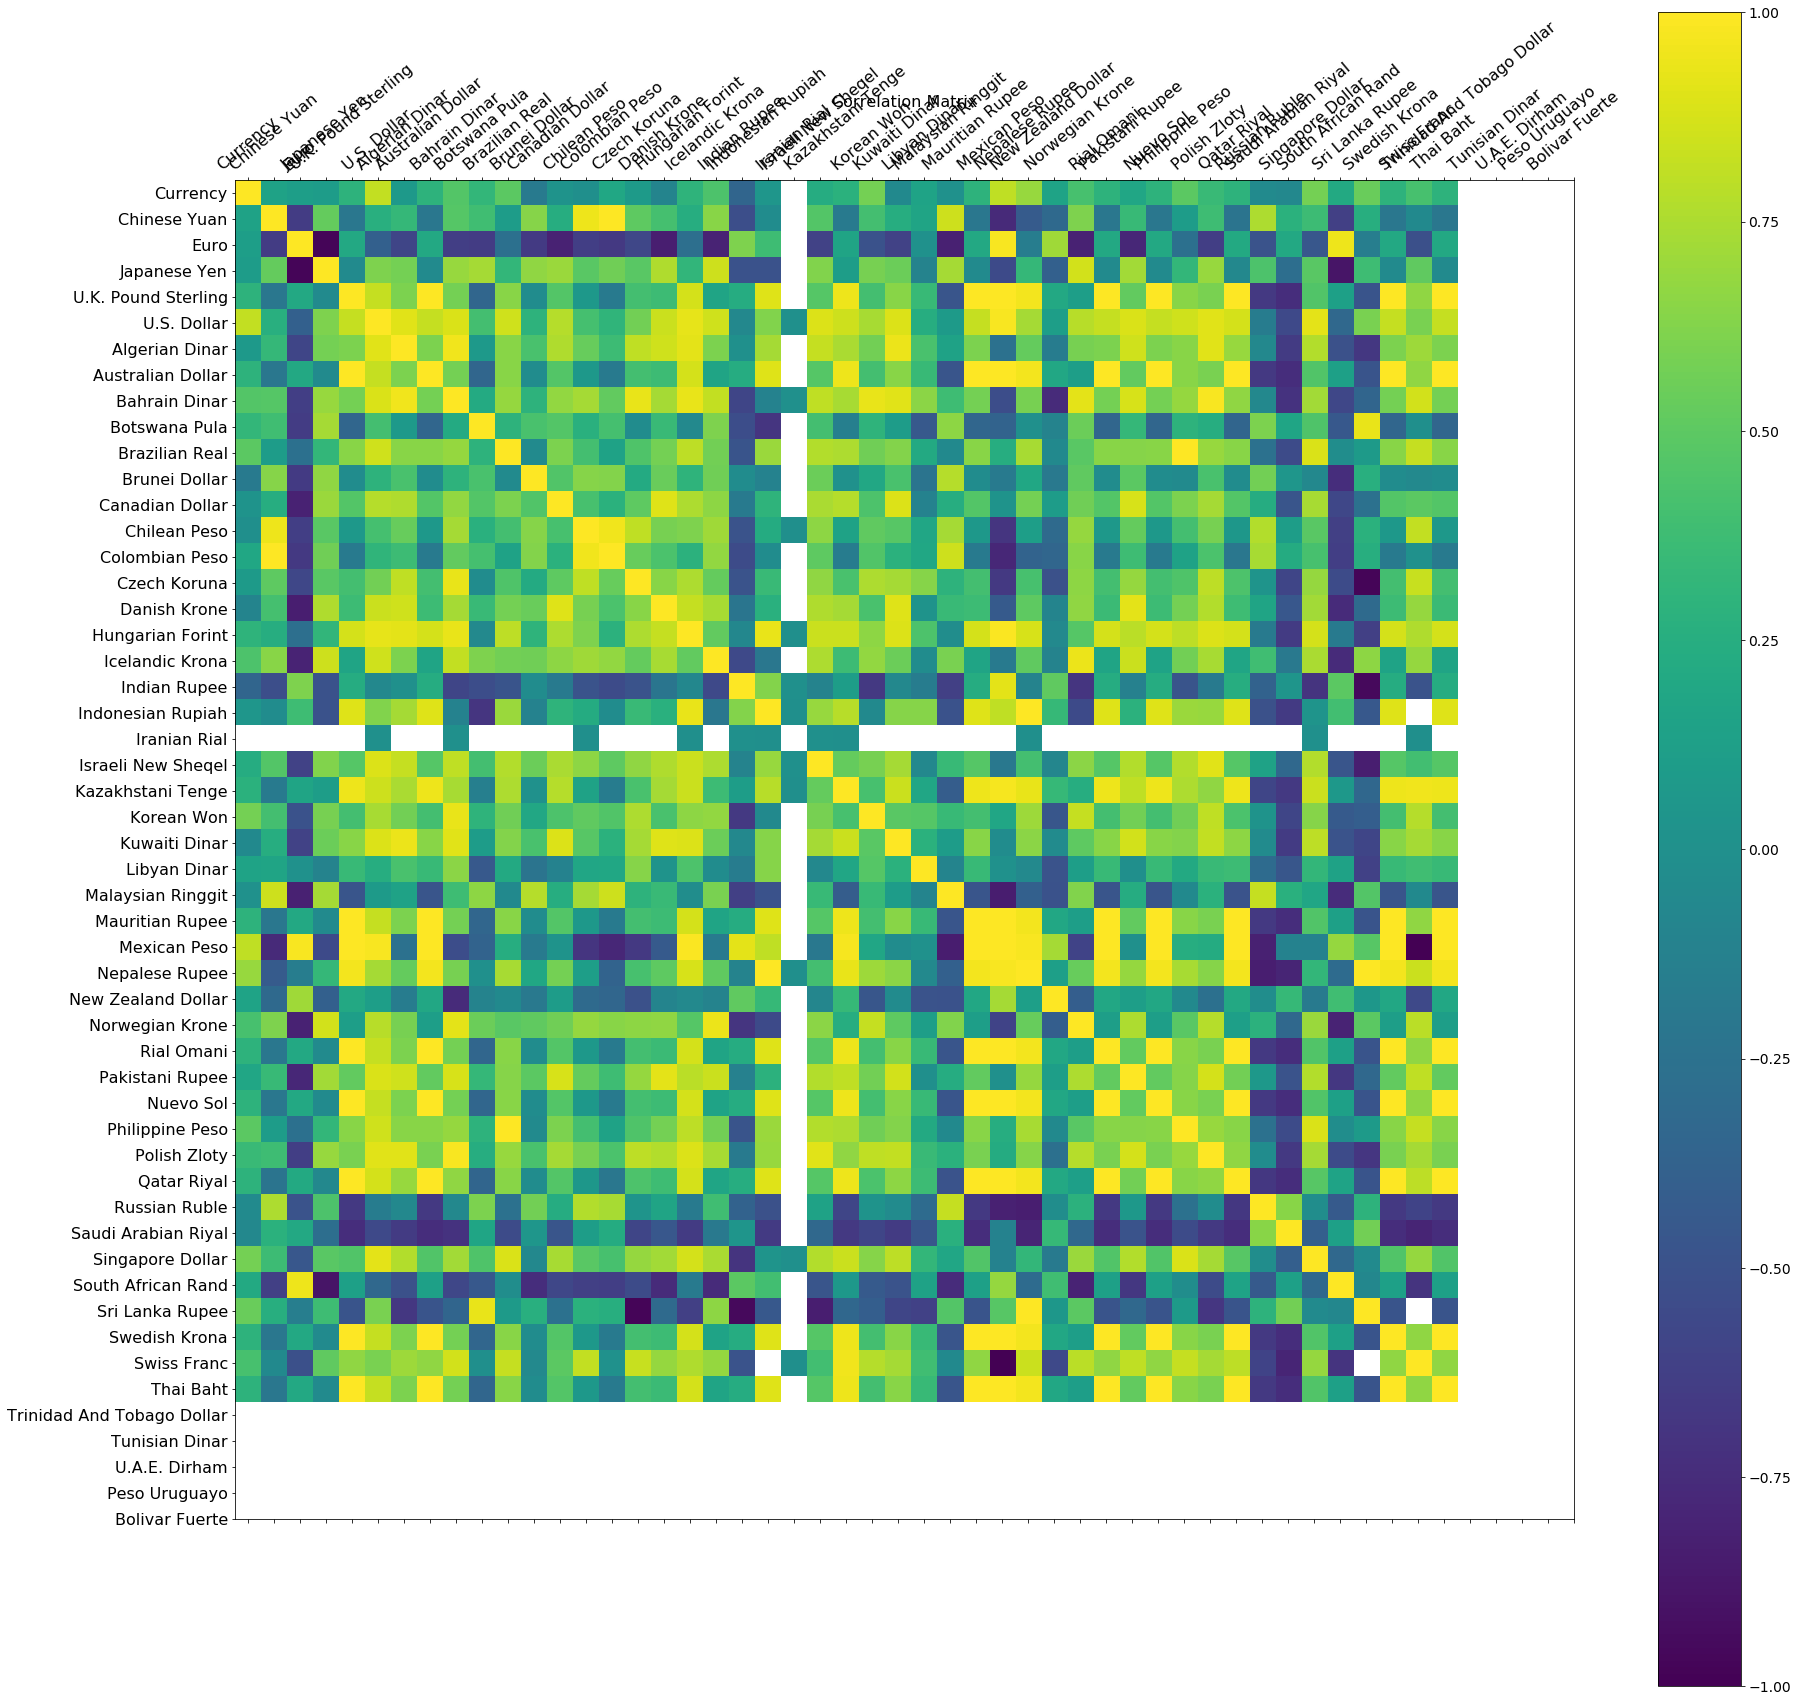

In [3]:
f = plt.figure(figsize=(30, 30))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=16, rotation=40)
plt.yticks(range(df.shape[1]), df.columns, fontsize=16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Correlation_Matrix_numericalVariables.png')

In [12]:
dfcorr = df.corr()
dfcorr

,Chinese Yuan,Euro,Japanese Yen,U.K. Pound Sterling,U.S. Dollar,Algerian Dinar,Australian Dollar,Bahrain Dinar,Botswana Pula,Brazilian Real,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,Peso Uruguayo,Bolivar Fuerte
Chinese Yuan,1.000000,0.151596,0.117566,0.108695,0.291582,8.152155e-01,0.077983,0.291926,4.676926e-01,0.320508,...,0.356889,0.296118,-0.044773,-0.069368,5.851485e-01,0.215925,0.542852,0.291300,4.215738e-01,0.292168
Euro,0.151596,1.000000,-0.645719,0.531150,-0.210587,2.599639e-01,0.331588,-0.209926,4.696684e-01,0.383645,...,0.382248,-0.234048,0.756618,0.277528,3.702819e-01,-0.621466,0.257016,-0.210770,-4.788910e-02,-0.210364
Japanese Yen,0.117566,-0.645719,1.000000,-0.970308,0.210295,-3.880988e-01,-0.582032,0.209957,-6.270147e-01,-0.641122,...,-0.629790,0.216936,-0.484786,0.209928,-4.580429e-01,0.952893,-0.147436,0.210296,-5.130655e-01,0.210351
U.K. Pound Sterling,0.108695,0.531150,-0.970308,1.000000,-0.042303,6.131856e-01,0.579213,-0.042220,6.890693e-01,0.731765,...,0.691677,-0.063891,0.439605,-0.274110,4.847034e-01,-0.884769,0.379161,-0.042522,5.128468e-01,-0.042480
U.S. Dollar,0.291582,-0.210587,0.210295,-0.042303,1.000000,8.220362e-01,0.607010,0.999999,5.808417e-01,-0.340426,...,0.596483,0.999985,-0.671798,-0.734504,4.573712e-01,0.135467,-0.481887,0.999999,6.658314e-01,0.999999
Algerian Dinar,0.815216,0.259964,-0.388099,0.613186,0.822036,1.000000e+00,0.908465,0.822349,8.833664e-01,0.401592,...,0.910574,0.872504,-0.157963,-0.561866,9.175429e-01,-0.321122,0.600139,0.821881,6.013162e-01,0.822238
Australian Dollar,0.077983,0.331588,-0.582032,0.579213,0.607010,9.084652e-01,1.000000,0.607349,9.572341e-01,0.071958,...,0.913906,0.687806,-0.067537,-0.651600,7.695417e-01,-0.504815,-0.677335,0.607053,7.108155e-01,0.607077
Bahrain Dinar,0.291926,-0.209926,0.209957,-0.042220,0.999999,8.223489e-01,0.607349,1.000000,5.814349e-01,-0.340569,...,0.596910,0.999984,-0.671219,-0.734555,4.576994e-01,0.135350,-0.482659,0.999999,6.660374e-01,0.999999
Botswana Pula,0.467693,0.469668,-0.627015,0.689069,0.580842,8.833664e-01,0.957234,0.581435,1.000000e+00,0.220811,...,0.977147,0.671245,-0.068228,-0.707980,7.257790e-01,-0.575553,-0.344260,0.580858,8.612704e-01,0.581198
Brazilian Real,0.320508,0.383645,-0.641122,0.731765,-0.340426,4.015918e-01,0.071958,-0.340569,2.208112e-01,1.000000,...,0.249574,-0.348204,0.604634,0.172026,4.482017e-01,-0.449111,0.935040,-0.340725,-1.463372e-03,-0.340619


In [16]:
round(dfcorr['Indian Rupee'].dropna(), 4).sort_values(ascending=False)

Indian Rupee                  1.0000
Pakistani Rupee               0.9917
Kuwaiti Dinar                 0.9311
Botswana Pula                 0.9308
Algerian Dinar                0.9232
Australian Dollar             0.9215
Nepalese Rupee                0.8977
South African Rand            0.8976
Nuevo Sol                     0.8778
Bolivar Fuerte                0.8732
Bahrain Dinar                 0.8732
Rial Omani                    0.8732
Saudi Arabian Riyal           0.8731
Qatar Riyal                   0.8731
U.S. Dollar                   0.8729
U.A.E. Dirham                 0.8729
Sri Lanka Rupee               0.8724
Thai Baht                     0.8681
Malaysian Ringgit             0.8405
Mauritian Rupee               0.8359
Icelandic Krona               0.8259
Singapore Dollar              0.7982
Brunei Dollar                 0.7982
Russian Ruble                 0.7903
Peso Uruguayo                 0.7585
Hungarian Forint              0.7547
Chilean Peso                  0.7511
M

In [18]:
dfcorr['Japanese Yen']['U.S. Dollar']

0.21029481387667098

In [19]:
dfcorr['Japanese Yen']['U.K. Pound Sterling']

-0.9703083181447885

In [20]:
dfcorr['Chinese Yuan']['Euro']

0.15159624624621695